regplot

Функция sns.regplot() используется для построения графиков регрессии, которые показывают отношения между двумя переменными с наложением линии регрессии. Функция sns.regplot() - это, по сути, упрощенный вариант функции sns.lmplot().

В отличие от sns.lmplot(), sns.regplot() не поддерживает создание сеток графиков с использованием категориальных переменных. Но в отличие от sns.lmplot(), в арсенале функции sns.regplot() имеется параметр ax, позволяющий легко интегрироваться с графиками, построенными с использованием функционала библиотеки matplotlib.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

seaborn.regplot(data=None, *, x=None, y=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, dropna=True, x_jitter=None, y_jitter=None, label=None, color=None, marker='o', scatter_kws=None, line_kws=None, ax=None)

sms.regplot()

Основные параметры:

1) data: DataFrame, массив;
2) x, y: переменные для построения графика. X и Y задают координаты;
3) x_estimator: позволяет задать функцию для оценки центрального значения в каждой группе значений по оси X;
4) x_bins: разбивает ось X на равные интервалы (бины) и отображает средние значения для каждого из этих интервалов;
5) x_ci: задаёт доверительный интервал для центрального значения по оси X  (по умолчанию x_ci='ci');
6) scatter: определяет рисовать ли диаграмму рассеяния (по умолчанию scatter=True);
7) fit_reg: если True (по умолчанию), на графике отображается регрессионная линия;
8) ci: доверительный интервал для линии регрессии (по умолчанию ci=95). Если None, доверительный интервал не строится.
9) n_boot: количество выборок для вычисления доверительного интервала (по умолчанию n_boot=1000);
10) seed: задает начальное значение для генератора случайных чисел, что обеспечивает повторяемость результатов при многократном запуске кода;
11) order: используется для указания степени полинома, который будет использоваться для построения регрессионной линии. По умолчанию order=1 - это означает, что линия регрессии будет прямой;
12) logistic: если True, то рисуется линия логистической регрессии вместо линейной (по умолчанию logistic=False);
13) lowess: если True, то рисуется линия lowess регрессии (локально взвешенная регрессия) вместо линейной (по умолчанию lowess=False);
14) robust: если True, то рисуется линия robust регрессии (устойчивая регрессия) вместо линейной (по умолчанию robust=False);
15) truncate: если True (по умолчанию), регрессионная линия обрезается до границ данных по оси X;
16) x_jitter: величина, на которую будут случайно смещены значения по оси X для визуализации распределения точек с одинаковыми X-значениями;
17) y_jitter: величина, на которую будут случайно смещены значения по оси Y для визуализации распределения точек с одинаковыми Y-значениями;
18) ax: позволяет указать оси (axes) matplotlib, на которых будет построен график.

In [8]:
df = sns.load_dataset('mpg').dropna()

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


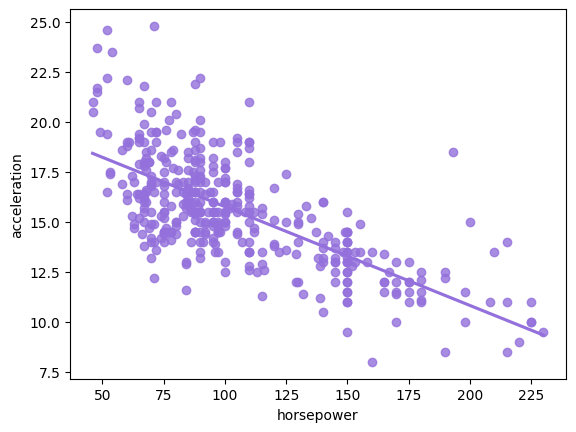

In [10]:
sns.regplot(data=df, x='horsepower', y='acceleration',
            color='MediumPurple',
            ci=None);

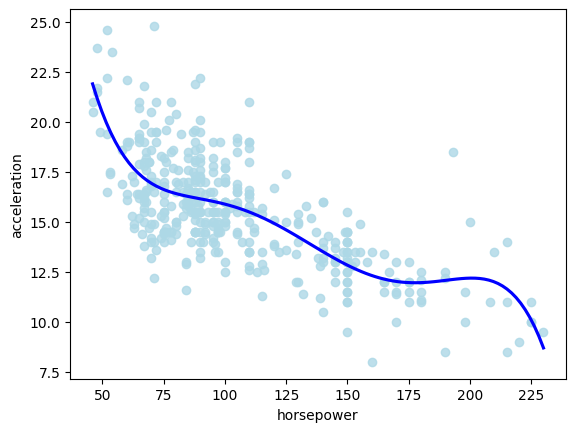

In [34]:
sns.regplot(data=df, x='horsepower', y='acceleration',
            color='LightBlue',
            order=5,
            ci=None,
            line_kws={'color': 'blue'});

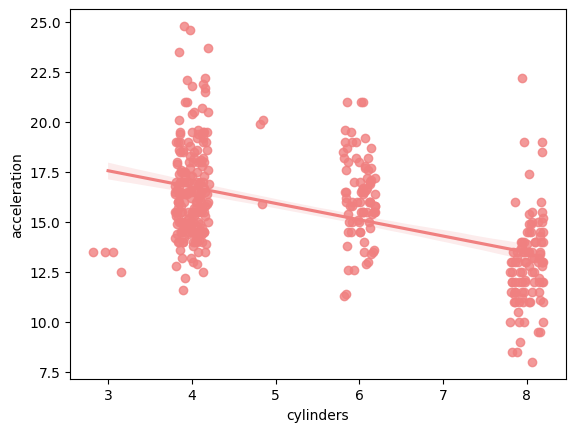

In [36]:
sns.regplot(data=df, x='cylinders', y='acceleration',
            color='LightCoral',
            x_jitter=0.2);

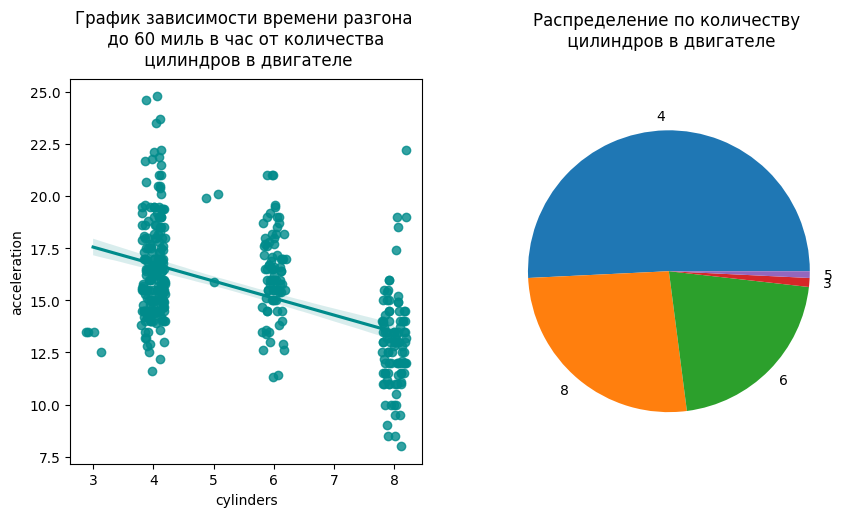

In [38]:
# В отличие от sns.lmplot(), функция sns.regplot() имеет в своём арсенале параметр ax, позволящий указать оси matplotlib, 
# на которых будет построен график. 
# Это полезно, когда вы хотите интегрировать regplot в существующий график или разместить несколько графиков на одной фигуре.

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Первый график
sns.regplot(data=df, x='cylinders', y='acceleration',
            color='DarkCyan',
            x_jitter=0.2,
            ax=ax1)

# Второй график
ax2.pie(data=df, x=df['cylinders'].value_counts(),
        labels=df['cylinders'].value_counts().index)

ax1.set_title('График зависимости времени разгона \n до 60 миль в час от количества \n цилиндров в двигателе', 
              pad=10)
ax2.set_title('Распределение по количеству \n цилиндров в двигателе', pad=35)

plt.show()